In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import latexify as lt

In [4]:
df1 = pd.read_csv('/home/patel_zeel/AirQualityTweets/Final Dataset/2016_Final.csv')
df2 = pd.read_csv('/home/patel_zeel/AirQualityTweets/Final Dataset/2017_Final.csv')
df3 = pd.read_csv('/home/patel_zeel/AirQualityTweets/Final Dataset/2018_Final.csv')
df4 = pd.read_csv('/home/patel_zeel/AirQualityTweets/Final Dataset/2019_Final.csv')
df5 = pd.read_csv('/home/patel_zeel/AirQualityTweets/Final Dataset/2020_Final.csv')
df1 = df1.append([df2,df3,df4,df5])


/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,8,11,12,13,14,17,18,19,20,25,26,28,29,30,34,35,37,39,44,45,46,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,7,8,11,12,13,14,17,18,19,20,25,26,28,29,30,34,35,37,39,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,7,10,11,12,13,16,17,18,23,24,26,27,28,32,33,35,37,42,43,44,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rishiraj.a/anacon

In [5]:
df1D = pd.read_csv('../all-delhi-tweets-2016.csv')
df2D = pd.read_csv('../all-delhi-tweets-2017.csv')
df3D = pd.read_csv('../all-delhi-tweets-2018.csv')
df4D = pd.read_csv('../all-delhi-tweets-2019.csv')
df1D = df1D.append([df2D,df3D,df4D])

/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df1D.shape

(898392, 11)

## Find Document in a topic

In [7]:
import re
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    text = re.sub('â€™', '', text)
    text = re.sub('œ', '', text)
    re.sub(r'[^\x00-\x7F]+','', text)
    return text

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

#not doing stemming.
def lemmatize_stemming(text):
    #stemmer = SnowballStemmer("english")
    return WordNetLemmatizer().lemmatize(text, pos='v')

def remove_nonascii(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(str(x) for x in result)

def remove_mention_hashtag(text):
    text = re.sub('# [a-zA-Z]*', '', text)
    text = re.sub('# [a-zA-Z]*', '', text)
    return text
    
def some_words(text):
    text = re.sub('air pollution', '', text)
    text = re.sub('pollution', '', text)
    return text

unable to import 'smart_open.gcs', disabling that module


In [8]:
topics = pd.read_csv("doctopic/vis-50-200.csv")

In [9]:
df1.head()

,Unnamed: 0,cashtags,conversation_id,created_at,date,day,favorites,geo,has_media,hashtags,...,trans_src,translate,tweet,tweet_id,user_id,user_id_str,user_rt,user_rt_id,username,video_url
0,NaN,NaN,NaN,NaN,2016-02-08 21:45:06,NaN,NaN,NaN,True,"['inhalers', 'lungdiseases']",...,NaN,NaN,One of our faculty members develops #inhalers ...,696812021149339648,43983572,NaN,NaN,NaN,University of Arizona College of Pharmacy,NaN
1,NaN,NaN,NaN,NaN,2016-02-11 16:40:01,NaN,NaN,NaN,False,['lungdiseases'],...,NaN,NaN,Did you know your health is less important tha...,697822408514920448,2371918142,NaN,NaN,NaN,Wayne Reid,NaN
2,NaN,NaN,NaN,NaN,2016-02-24 18:45:30,NaN,NaN,NaN,False,['LungDiseases'],...,NaN,NaN,New inhalers to treat #LungDiseases http://ow....,702565027660865536,596539811,NaN,NaN,NaN,McCann Health Medical Communications,NaN
3,NaN,NaN,NaN,NaN,2016-02-24 12:15:14,NaN,NaN,NaN,False,['LungDiseases'],...,NaN,NaN,New inhalers to treat #LungDiseases http://ow....,702466816065609728,596539811,NaN,NaN,NaN,McCann Health Medical Communications,NaN
4,NaN,NaN,NaN,NaN,2016-04-24 02:41:29,NaN,NaN,NaN,False,"['Gurgaon', 'pollution', 'smoke', 'nofreshair'...",...,NaN,NaN,Woke up to zero visibility and so much smoke i...,724065697882619904,209202972,NaN,NaN,NaN,Pallavi Jain,NaN


In [10]:
raw = df1D[['text','date','username']]
#raw = df1[['tweet','date','username']] #for new data
raw = raw.rename(columns={'text':'Text'})
#raw = raw.rename(columns={'tweet':'Text'}) #for new data

In [11]:
raw['Text'] = [clean_text_round1(item) for item in raw['Text']]
raw['Text'] = [clean_text_round2(item) for item in raw['Text']]
raw['Text'] = [preprocess(item) for item in raw['Text']]
#remove anything that is non-ascii
raw['Text'] = [remove_nonascii(item) for item in raw['Text']]
raw['Text'] = [remove_mention_hashtag(item) for item in raw['Text']]
raw['Text'] = [some_words(item) for item in raw['Text']]
raw = raw.drop_duplicates(['Text'],keep='first')

In [12]:
#the temp dataframe here is meant to be used later also in other analysis
temp = pd.merge(raw,topics, on='Text')
final = temp[['date', 'Dominant_Topic']]
#final = temp[['date', 'Dominant_Topic', 'Text']]
#oddeven = temp[final['Dominant_Topic'] == 0.0]
#oddeven.to_csv('doctopic/odd-even-tweets-2016-2019.csv')
final['freq'] = 1

/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
#topicInterest = [24.0,38.0,42.0,1.0,5.0,10.0,12.0,15.0,33.0,41.0]
# 2:'Vehcile'
#13:'People'
#11:'PlantTree'
#24:'WaterDust'

#vis-50-200
topicInterest = {0:'SupremeCourt&News',1:'IndiaAir',4:'SmogChokeToxic',5:'MaskFaceProblem',7:'AirDelhiNCR',13:'FlightTrainDelhi',15:'FreeTreePlant',18:'TrafficState',27:'OddEven',31:'StubblePH',34:'SmogTowerJoke',46:'NoidaGurgaon',48:'DiwaliCracker'}

#vis-20-50
#topicInterest = {0:'OddEven',3:'Traffic',6:'DelhiSmog',8:'Rain',10:'FreeMask',14:'StubbleBurn',15:'PeopleDiwali',17:'ChildrenAirLung',18:'Govt'}


dataframeList = []
for topicNo, topicName in topicInterest.items():
    a = pd.DataFrame()
    a = final[final['Dominant_Topic']==topicNo] #oddeven
    a.index = pd.to_datetime(a['date'])
    #remove date because it became index. Dominant_topic is not required as we not have frequency per timestamp
    a = a.drop(['date','Dominant_Topic'], axis=1)
    #take sum over all the timestamp on a monthyl scale
    a = a.resample('M').sum()
    a = a.rename(columns={'freq':topicName})
    dataframeList.append(a)

#store all other topics which are not in the list of topic of interest
a = pd.DataFrame()
a = final[~final['Dominant_Topic'].isin(list(topicInterest.keys()))]
a.index = pd.to_datetime(a['date'])
a = a.drop(['date','Dominant_Topic'], axis=1)
a = a.resample('M').sum()
a = a.rename(columns={'freq':'Others'})
dataframeList.append(a)
    
#finally do some post production and the output is ready    
F = pd.concat(dataframeList, axis=1)
#F = F.rename(columns={'10freq':'E-Minister', '12freq':'Vehicles', '15freq':'School','1freq':'Health','24freq':'OddEven','33freq':'Mask','38freq':'Stubble Burning','41freq':'Dust','42freq':'Diwali','5freq':'Cricket'})
F = F.fillna(0)
F = F.astype(int)
F = F.drop(pd.Timestamp('2020-01-31'),axis=0) #drop January 2020

In [10]:
F

,SupremeCourt&News,IndiaAir,SmogChokeToxic,MaskFaceProblem,AirDelhiNCR,FlightTrainDelhi,FreeTreePlant,TrafficState,OddEven,StubblePH,SmogTowerJoke,NoidaGurgaon,DiwaliCracker,Others
date,,,,,,,,,,,,,,
2016-01-31,763,266,219,262,91,157,669,868,11646,94,87,75,176,16420
2016-02-29,158,83,38,98,30,41,72,67,1477,16,6,11,14,2382
2016-03-31,14,36,12,24,15,2,17,27,385,2,3,5,7,761
2016-04-30,154,68,45,93,118,36,225,359,6022,79,31,25,23,7202
2016-05-31,118,68,19,50,36,11,149,80,1281,61,23,17,13,3126
2016-06-30,36,32,14,16,17,3,28,41,190,24,3,8,1,863
2016-07-31,21,15,10,13,21,3,39,27,197,30,1,2,31,594
2016-08-31,16,21,9,16,13,3,20,15,144,25,2,5,1,409
2016-09-30,12,24,6,12,11,2,17,22,114,14,0,4,7,380


In [11]:
F0 = F.copy(deep=True)

#Normalize it 
#for idx in range(0,len(F0)):   
#    F0.iloc[idx,:] = F0.iloc[idx,:]/sum(F0.iloc[idx,:])

for col in F0.columns:
    F0[col] = F0[col]/sum(F0[col])

In [13]:
F0.to_csv('topic-vs-time-2016-2019-Delhi.csv')

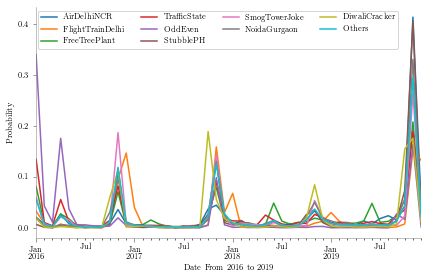

In [20]:
#plot topic evolution over time
F0 = F.copy(deep=True)

#Normalize it 
#for idx in range(0,len(F0)):   
#    F0.iloc[idx,:] = F0.iloc[idx,:]/sum(F0.iloc[idx,:])

for col in F0.columns:
    F0[col] = F0[col]/sum(F0[col])
    
lt.latexify(columns=2)
ax0 = F0.plot()
ax0.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.45, 0.5), ncol=4)
ax0.set_xlabel('Date From 2016 to 2019')
ax0.set_ylabel('Probability')
lt.format_axes(ax0)
plt.savefig("topic-evolution-2016-2019-ver2.pdf", dpi=300, bbox_inches = "tight")

In [14]:
F1 = F.copy(deep=True)
lt.latexify(columns=2)
F1.index = F1.index.strftime("%m")
#Normalize it 
for idx in range(0,len(F1)):   
    F1.iloc[idx,:] = F1.iloc[idx,:]/sum(F1.iloc[idx,:])

In [15]:
F1.to_csv('topic-vs-time-2016-2019-Delhi.csv')


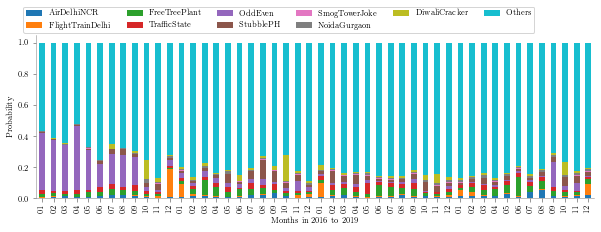

In [22]:
F1 = F.copy(deep=True)
lt.latexify(columns=2)
F1.index = F1.index.strftime("%m")
#Normalize it 
for idx in range(0,len(F1)):   
    F1.iloc[idx,:] = F1.iloc[idx,:]/sum(F1.iloc[idx,:])

ax = F1.plot.bar(stacked=True, legend=True, figsize=(10,3))
#ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(topicInterest)))))
ax.legend(loc='best', bbox_to_anchor=(0.4, 0.7, 0.5, 0.5), ncol=6)
ax.set_xlabel('Months in 2016 to 2019')
ax.set_ylabel('Probability')
lt.format_axes(ax)
plt.savefig("topic-evolution-bar-2016-2019-ver2.pdf", dpi=300, bbox_inches = "tight")

In [61]:
F

,OddEven,Traffic,DelhiSmog,Rain,FreeMask,StubbleBurn,PeopleDiwali,ChildrenAirLung,Govt,Others
date,,,,,,,,,,
2016-01-31,9424,828,164,101,744,180,1255,454,1189,17454
2016-02-29,1495,90,28,76,118,48,137,83,255,2163
2016-03-31,350,29,8,70,25,12,21,35,93,667
2016-04-30,4543,389,37,83,227,87,486,150,479,7999
2016-05-31,1059,100,24,24,124,57,176,70,256,3162
2016-06-30,152,31,9,8,25,10,64,45,101,831
2016-07-31,171,43,9,3,45,11,31,40,80,571
2016-08-31,108,36,2,9,16,7,51,13,41,416
2016-09-30,85,30,9,6,20,14,26,24,48,363


## Topic interest per user

In [13]:
# temp is the dataframe with tweet and dominant_topic and username
temp

,Text,date,username,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,great initiative delhi people govt busy play b...,2016-11-06 10:24,DeepakSondhale,0,0,8.0,0.4020,"take, blame, step, politics, party, instead, p..."
1,quality delhi unhealthy right delhichokes,2016-02-01 05:01,DelhiChokes,1,1,45.0,0.4040,"quality, poor, airquality, delhis, improve, in..."
2,breathless chic delhi fight style scrollin,2016-02-01 04:06,AirPollutionnew,2,2,1.0,0.3417,"india, air, cleanair, newdelhi, north, china, ..."
3,formula answer delhis,2016-02-01 04:01,boturbotrader,3,3,27.0,0.4089,"oddeven, scheme, rule, follow, implement, supp..."
4,formula answer delhis,2016-02-01 03:58,lilyhuj,4,4,27.0,0.4088,"oddeven, scheme, rule, follow, implement, supp..."
...,...,...,...,...,...,...,...,...
407482,globalncap delhi today present transport highw...,2019-02-12 16:09,trafficwisdom,407483,407483,39.0,0.2034,"kejriwal, public, modi, transport, arvind, ans..."
407483,delhi today present transport highways ministe...,2019-02-12 15:52,GlobalNCAP,407484,407484,39.0,0.2034,"kejriwal, public, modi, transport, arvind, ans..."
407484,great delhi today meet nitingadkari morthindia...,2019-02-12 15:09,DavidDjward,407485,407485,40.0,0.2793,"meet, leave, gautamgambhir, important, miss, d..."
407485,impressive guide strong action take indian gov...,2019-03-30 12:09,DavidDjward,407486,407486,8.0,0.1604,"take, blame, step, politics, party, instead, p..."


In [14]:
userdf = temp[['username','Dominant_Topic','date','Text']]
userdf.index = pd.to_datetime(userdf['date'])

topicOfInterest = [2.0,12.0,6.0,16.0,11.0,21.0,9.0,14.0,24.0]
topicOfInterest = {12:'NeedSolutions', 7:'AirDelhiNCR',44:'DelhiAirQuality',15:'FreeTreePlant',18:'TrafficState',27:'OddEven',31:'StubblePH',34:'SmogTowerJoke',46:'NoidaGurgaon',48:'DiwaliCracker'}
userOfInterest = ['UrbanEmissions','htTweets', 'pallavipnt', 'GautamGambhir']

di = {'username':[],'other':[]}
di.update({val:[] for k, val in topicOfInterest.items()})



for user in userOfInterest:
    di['username'].append(user)
    t = pd.DataFrame()
    try: #what if the userofinterest does not exists?
        t = userdf[userdf['username'] == user]
    except:
        continue
    for topicNo,topicName in topicOfInterest.items():
        di[topicName].append(len(t[t['Dominant_Topic'] == float(topicNo)]))
    di['other'].append(len(t[~t['Dominant_Topic'].isin(topicOfInterest)]))
    
        
userTopics = pd.DataFrame.from_dict(di)
userTopics.index = userTopics['username']
userTopics = userTopics.drop(['username'], axis=1)



In [16]:
userTopics

,other,NeedSolutions,AirDelhiNCR,DelhiAirQuality,FreeTreePlant,TrafficState,OddEven,StubblePH,SmogTowerJoke,NoidaGurgaon,DiwaliCracker
username,,,,,,,,,,,
UrbanEmissions,0.632850,0.077295,0.014493,0.169082,0.004831,0.004831,0.009662,0.014493,0.000000,0.009662,0.062802
htTweets,0.742958,0.010563,0.008803,0.022887,0.007042,0.005282,0.133803,0.052817,0.001761,0.007042,0.007042
pallavipnt,0.750000,0.125000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.020833,0.041667
GautamGambhir,0.800000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


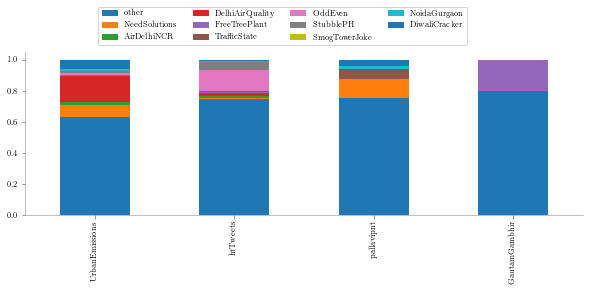

In [50]:
#normalize
for idx in range(0,len(userTopics)):   
    userTopics.iloc[idx,:] = userTopics.iloc[idx,:]/sum(userTopics.iloc[idx,:])
from matplotlib import cm
NUM_COLORS = 25
#cmap = cm.get_cmap('Spectral')

#ax = userTopics.plot.bar(stacked=True, legend=True, figsize=(10,3), cmap=cmap)
ax = userTopics.plot.bar(stacked=True, legend=True, figsize=(10,3))

ax.legend(loc='best', bbox_to_anchor=(0.3, 0.8, 0.5, 0.5), ncol=4)
ax.set_xlabel('')
ax.set_ylabel('')
lt.format_axes(ax)
plt.savefig('userofInterest-bar.pdf',dpi=300, bbox_inches = "tight")

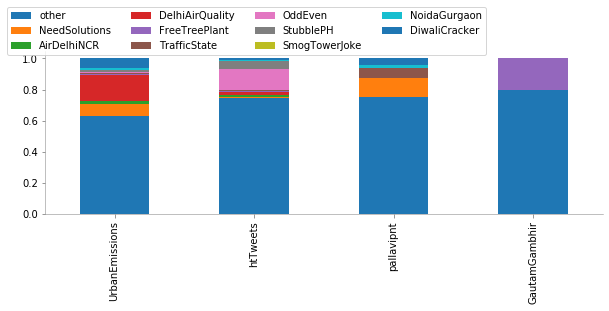

In [15]:
#normalize
for idx in range(0,len(userTopics)):   
    userTopics.iloc[idx,:] = userTopics.iloc[idx,:]/sum(userTopics.iloc[idx,:])
from matplotlib import cm
NUM_COLORS = 25
#cmap = cm.get_cmap('Spectral')

#ax = userTopics.plot.bar(stacked=True, legend=True, figsize=(10,3), cmap=cmap)
ax = userTopics.plot.bar(stacked=True, legend=True, figsize=(10,3))

ax.legend(loc='best', bbox_to_anchor=(0.3, 0.8, 0.5, 0.5), ncol=4)
ax.set_xlabel('')
ax.set_ylabel('')
lt.format_axes(ax)
plt.savefig('userofInterest-bar.pdf',dpi=300, bbox_inches = "tight")

# \#tweets over time for a user

In [13]:
d = temp[['date','username']]
d['freq'] = 1
d.index = pd.to_datetime(d['date'])
d = d.drop(['date'], axis=1)

/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
userOfInterest = ['UrbanEmissions','htTweets', 'pallavipnt', 'GautamGambhir']
d = d[d['username'].isin(userOfInterest)]

In [29]:
p1 = d[d['username'] == 'htTweets']
p1 = p1.drop(['username'], axis=1)
p1 = p1.rename(columns={'freq':'htTweets'})

p2 = d[d['username'] == 'UrbanEmissions']
p2 = p2.drop(['username'], axis=1)
p2 = p2.rename(columns={'freq':'UE'})

p3 = d[d['username'] == 'pallavipnt']
p3 = p3.drop(['username'], axis=1)
p3 = p3.rename(columns={'freq':'PallaviPnt'})

p4 = d[d['username'] == 'GautamGambhir']
p4 = p4.drop(['username'], axis=1)
p4 = p4.rename(columns={'freq':'GautamGambhir'})

In [41]:
p = p1.append([p2,p3,p4])

/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [42]:
p = p.resample('1M').sum()

Text(0.5, 0, 'Months From 2016 to 2019')

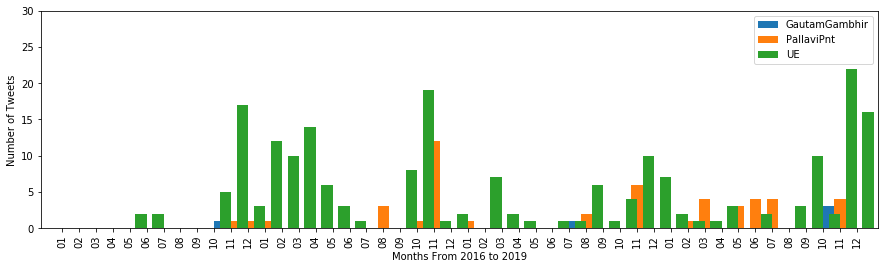

In [62]:
ax = p.plot.bar(y=['GautamGambhir','PallaviPnt','UE'], figsize=(15,4), width=2)
#p.index = p.index.strftime("%m")
ax.set_ylim([0,30])
#ax.set_yticklabels([0,20])
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Months From 2016 to 2019')

In [64]:
d[d['username']=='GautamGambhir']

,username,freq
date,,
2016-11-02 18:42:00,GautamGambhir,1
2018-08-01 10:35:00,GautamGambhir,1
2019-11-18 18:44:00,GautamGambhir,1
2019-11-01 16:58:00,GautamGambhir,1
2019-11-01 16:58:00,GautamGambhir,1


# PART 2 OF NEW DATASET | TOPIC EVOLUTION

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import latexify as lt

In [46]:
tweetTopic = pd.read_csv('doctopic/vis-50-200-NEWDATA.csv')
raw = pd.read_csv('tweetdata/final-2016-2020-withFollower.csv')
raw = raw[['username','date','tweet','FollowerCount']]
raw = raw.rename(columns={'tweet':'Text'})

/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,10,11,14,15,16,18,19,20,26,27,29,30,31,35,36,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
final = pd.merge(raw,tweetTopic, on='Text')
final = final[['date', 'Dominant_Topic']]
final['freq'] = 1

In [48]:
final

,date,Dominant_Topic,freq
0,2016-02-08 21:45:06,34.0,1
1,2016-02-11 16:40:01,38.0,1
2,2016-02-24 18:45:30,34.0,1
3,2016-02-24 12:15:14,34.0,1
4,2016-04-03 20:36:30,39.0,1
...,...,...,...
27204355,2020-03-14 03:53:10,13.0,1
27204356,2020-03-14 03:40:30,13.0,1
27204357,2020-03-14 03:12:16,41.0,1
27204358,2020-03-14 03:05:23,37.0,1


In [62]:

topicInterest = {#2:'ParticulateMatterPolicy',
                 #3:'ProtectCleanair',
                 4:'CleanWater',
                 #5:'AwarnessCampaign',
                 6:'CoughEye',
                 8:'People',
                 9:'TrafficRoad',
                 11:'DustPollutants',
                 12:'TakeAction',
                 13:'SmogMaskWear',
                 #15:'MonitorData',
                 #16:'SaveTrees',
                 17:'LongTermSolutions',
                 18:'DelhismogDelhiChokes',
                 #21:'LungsDamage',
                 25:'BetterPublicTransport',
                 30:'PunjabStubbleHaryana',
                 33:'OddevenScheme',
                 34:'LunghealthLungdiseaseCopd',
                 40:'WoodbClimateaPurifiers',
                 41:'Worldhealthday',
                 43:'Climatechange',
                 47:'CancerDiseaseDeath',
                 48:'Electricvehicle'
                }

dataframeList = []
for topicNo, topicName in topicInterest.items():
    a = pd.DataFrame()
    a = final[final['Dominant_Topic']==topicNo] #oddeven
    a.index = pd.to_datetime(a['date'])
    #remove date because it became index. Dominant_topic is not required as we not have frequency per timestamp
    a = a.drop(['date','Dominant_Topic'], axis=1)
    #take sum over all the timestamp on a monthyl scale
    a = a.resample('M').sum()
    a = a.rename(columns={'freq':topicName})
    dataframeList.append(a)

#store all other topics which are not in the list of topic of interest
a = pd.DataFrame()
a = final[~final['Dominant_Topic'].isin(list(topicInterest.keys()))]
a.index = pd.to_datetime(a['date'])
a = a.drop(['date','Dominant_Topic'], axis=1)
a = a.resample('M').sum()
a = a.rename(columns={'freq':'Others'})
dataframeList.append(a)
    
#finally do some post production and the output is ready    
F = pd.concat(dataframeList, axis=1)
#F = F.rename(columns={'10freq':'E-Minister', '12freq':'Vehicles', '15freq':'School','1freq':'Health','24freq':'OddEven','33freq':'Mask','38freq':'Stubble Burning','41freq':'Dust','42freq':'Diwali','5freq':'Cricket'})
F = F.fillna(0)
F = F.astype(int)
#F = F.drop(pd.Timestamp('2020-01-31'),axis=0) #drop January 2020

In [63]:
F.head()

,CleanWater,CoughEye,People,TrafficRoad,DustPollutants,TakeAction,SmogMaskWear,LongTermSolutions,DelhismogDelhiChokes,BetterPublicTransport,PunjabStubbleHaryana,OddevenScheme,LunghealthLungdiseaseCopd,WoodbClimateaPurifiers,Worldhealthday,Climatechange,CancerDiseaseDeath,Electricvehicle,Others
date,,,,,,,,,,,,,,,,,,,
2016-01-31,50,35,86,132,89,190,116,143,207,345,111,12137,209,25,83,80,97,564,7405
2016-02-29,16,14,6,18,79,19,37,30,21,115,20,1588,135,13,25,21,71,111,2262
2016-03-31,13,5,7,17,69,19,28,17,23,84,12,379,180,21,127,88,65,72,1805
2016-04-30,54,48,38,79,119,106,32,106,97,255,78,6354,324,35,3524,75,258,301,6858
2016-05-31,21,14,11,22,65,23,23,51,20,98,16,1402,277,17,49,39,96,116,2730


In [64]:
for col in F.columns:
    F[col] = F[col]/sum(F[col])

In [65]:
len(F.columns)

19

In [66]:
df = F

In [67]:
cols = df.columns[:28]

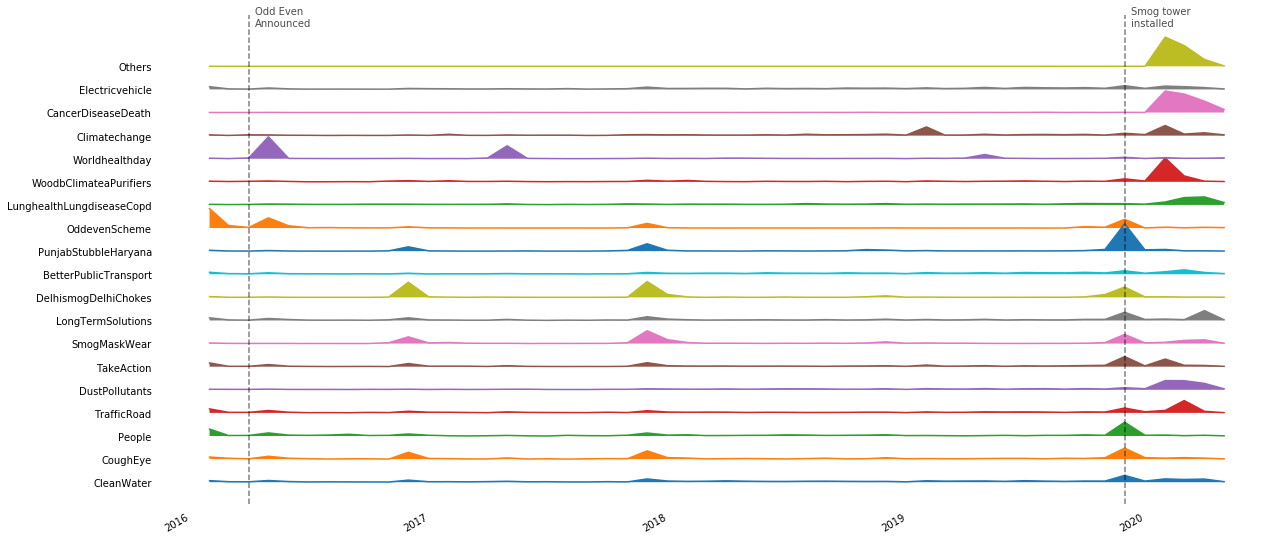

In [68]:
import datetime as dt
import matplotlib.dates as mdates
plt.figure(figsize=(20,10))
fac = 2.5
for ind, col_name in enumerate(cols):
    plt.plot(df.index, df[col_name]+ind/fac)
    plt.fill_between(df.index, df[col_name]+ind/fac, ind/fac )
plt.yticks(np.arange(0, len(cols)*1.0/fac, 1/fac), cols)



ax = plt.gca()
# Removing spine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x-axis label
ax.set_xlabel('')


plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    left=False)

 

x_line_annotation = dt.datetime(2016, 4, 1)
x_text_annotation = dt.datetime(2016, 4, 10)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5,  color='#000000')
ax.text(x=x_text_annotation, y=len(cols)*1.0/fac + 0.3, s='Odd Even \nAnnounced', alpha=0.7, color='#000000')
fig = plt.gcf()

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
ax.format_xdata = mdates.DateFormatter('%M')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

fig.autofmt_xdate()


x_line_smog = dt.datetime(2019, 12, 1)
x_text_smog = dt.datetime(2019, 12, 10)
ax.axvline(x=x_line_smog, linestyle='dashed', alpha=0.5,  color='#000000')
ax.text(x=x_text_smog, y=len(cols)*1.0/fac + 0.3, s='Smog tower \ninstalled', alpha=0.7, color='#000000');
#plt.savefig("topics-evolution.pdf", bbox_inches="tight")

# PART 2 OF NEW DATASET | USER TOPIC DIST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import latexify as lt

In [2]:
tweetTopic = pd.read_csv('doctopic/vis-50-200-NEWDATA.csv')
raw = pd.read_csv('tweetdata/final-2016-2020-withFollower.csv')
raw = raw[['username','date','tweet','FollowerCount']]
raw = raw.rename(columns={'tweet':'Text'})

final = pd.merge(raw,tweetTopic, on='Text')
final = final[['date', 'Dominant_Topic','username','Text', 'FollowerCount']]
#final['freq'] = 1

/home/rishiraj.a/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,10,11,14,15,16,18,19,20,26,27,29,30,31,35,36,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
final.head(2)

,date,Dominant_Topic,username,Text,FollowerCount
0,2016-02-08 21:45:06,34.0,University of Arizona College of Pharmacy,faculty members develop inhalers treat lungdis...,0
1,2016-02-11 16:40:01,38.0,Wayne Reid,know health important wildlife come local plan...,0


In [30]:
userdf = final
userdf.index = pd.to_datetime(userdf['date'])
userdf = userdf.drop(['date'],axis=1)

In [31]:
userdf

,Dominant_Topic,username,Text
date,,,
2016-02-08 21:45:06,34.0,University of Arizona College of Pharmacy,faculty members develop inhalers treat lungdis...
2016-02-11 16:40:01,38.0,Wayne Reid,know health important wildlife come local plan...
2016-02-24 18:45:30,34.0,McCann Health Medical Communications,inhalers treat lungdiseases httpowlyygyrq uahe...
2016-02-24 12:15:14,34.0,McCann Health Medical Communications,inhalers treat lungdiseases httpowlyygynd uahe...
2016-04-03 20:36:30,39.0,FourTwentyTradingCo®,salt smoke lungs goodvibes roll yallblazeup
...,...,...,...
2020-03-14 03:53:10,13.0,zarojstore,adventure accessories motorcycle face mask ant...
2020-03-14 03:40:30,13.0,DesignCaseV,check filter paper anti haze mouth mask anti d...
2020-03-14 03:12:16,41.0,M_Imelody,healthy food carte serve spoon wash hand alcoh...


In [26]:
topicOfInterest = {2:'ParticulateMatterPolicy',
                 3:'ProtectCleanair',
                 4:'CleanWater',
                 5:'AwarnessCampaign',
                 6:'CoughEye',
                 8:'People',
                 9:'TrafficRoad',
                 11:'DustPollutants',
                 12:'TakeAction',
                 13:'SmogMaskWear',
                 15:'MonitorData',
                 16:'SaveTrees',
                 17:'LongTermSolutions',
                 18:'DelhismogDelhiChokes',
                 36:'PoorQuality',
                 21:'LungsDamage',
                 25:'BetterPublicTransport',
                 30:'PunjabStubbleHaryana',
                 33:'OddevenScheme',
                 34:'LunghealthLungdiseaseCopd',
                 40:'WoodbClimateaPurifiers',
                 41:'Worldhealthday',
                 43:'Climatechange',
                 47:'CancerDiseaseDeath',
                 48:'Electricvehicle'
                }

userOfInterest = ['UrbanEmissions','htTweets', 'pallavipnt', 'GautamGambhir']

di = {'username':[],'other':[]}
di.update({val:[] for k, val in topicOfInterest.items()})



for user in userOfInterest:
    di['username'].append(user)
    t = pd.DataFrame()
    try: #what if the userofinterest does not exists?
        t = userdf[userdf['username'] == user]
    except:
        continue
    for topicNo,topicName in topicOfInterest.items():
        di[topicName].append(len(t[t['Dominant_Topic'] == float(topicNo)]))
    di['other'].append(len(t[~t['Dominant_Topic'].isin(topicOfInterest)]))
    
        
userTopics = pd.DataFrame.from_dict(di)
userTopics.index = userTopics['username']
userTopics = userTopics.drop(['username'], axis=1)

In [17]:
for idx in range(0,len(userTopics)):   
    userTopics.iloc[idx,:] = userTopics.iloc[idx,:]/sum(userTopics.iloc[idx,:])
    
userTopics.head(2)

,other,ParticulateMatterPolicy,ProtectCleanair,CleanWater,AwarnessCampaign,CoughEye,People,TrafficRoad,DustPollutants,TakeAction,...,LungsDamage,BetterPublicTransport,PunjabStubbleHaryana,OddevenScheme,LunghealthLungdiseaseCopd,WoodbClimateaPurifiers,Worldhealthday,Climatechange,CancerDiseaseDeath,Electricvehicle
username,,,,,,,,,,,,,,,,,,,,,
UrbanEmissions,0.460396,0.0,0.00495,0.00495,0.009901,0.0,0.009901,0.009901,0.014851,0.014851,...,0.00495,0.029703,0.202970,0.024752,0.00495,0.00495,0.0,0.00495,0.0,0.054455
htTweets,0.355372,0.0,0.00000,0.00000,0.000000,0.0,0.008264,0.000000,0.000000,0.000000,...,0.00000,0.016529,0.016529,0.272727,0.00000,0.03719,0.0,0.00000,0.0,0.016529


# Use FINAL dataframe to do some nice analysis

In [4]:
final.head()

,date,Dominant_Topic,username,Text,FollowerCount
0,2016-02-08 21:45:06,34.0,University of Arizona College of Pharmacy,faculty members develop inhalers treat lungdis...,0
1,2016-02-11 16:40:01,38.0,Wayne Reid,know health important wildlife come local plan...,0
2,2016-02-24 18:45:30,34.0,McCann Health Medical Communications,inhalers treat lungdiseases httpowlyygyrq uahe...,0
3,2016-02-24 12:15:14,34.0,McCann Health Medical Communications,inhalers treat lungdiseases httpowlyygynd uahe...,0
4,2016-04-03 20:36:30,39.0,FourTwentyTradingCo®,salt smoke lungs goodvibes roll yallblazeup,0


In [15]:
final['username'].value_counts()[85:120]

WX Estevan                     1302
WX Victoria                    1302
WX Parry Sound                 1302
WX Saskatoon                   1302
Evergreen Nebulisers - Gail    1170
Scapeler                       1127
airqualitynepal                1067
MostOkest                      1035
MoreThanBetter4                1034
HyperHygiene                    899
IrshadSalim                     822
Lung Health Institute           787
wc_swiftcurrent                 656
WX Kentville                    651
wc_coldlake                     651
WX Courtenay                    651
WX Swift Current                651
WX New Glasgow                  651
wc_smithers                     651
wc_newglasgow                   651
WX London                       651
WX Pembroke                     651
WX Petawawa                     651
WX Walkerton                    651
wc_quesnel                      651
wc_victoria                     651
WX Greenwood                    651
WX Sydney                   

In [40]:
final[final['username'] == 'htdelhi']

,date,Dominant_Topic,username,Text,FollowerCount
23551,2016-04-09 11:06:00,15.0,htdelhi,oddeven govt step quality monitor efforts http...,10936
24017,2017-01-29 23:39:00,13.0,htdelhi,toxic airquality sector gurgaon,10936
24018,2017-01-29 23:39:00,13.0,htdelhi,toxic airquality sector gurgaon,10936
24021,2017-01-12 23:34:00,24.0,htdelhi,punjabi bagh delhi airquality poisonous level,10936
24022,2017-01-12 23:34:00,24.0,htdelhi,punjabi bagh delhi airquality poisonous level,10936
...,...,...,...,...,...
26777461,2019-12-12 10:44:00,36.0,htdelhi,quality delhi continue severe category rain br...,10936
26779202,2019-11-04 06:50:00,11.0,htdelhi,secondary particles jump report,10936
26779275,2019-12-02 06:09:00,26.0,htdelhi,check pollutants report soumyapillai,10936
26796380,2020-01-23 10:08:14,36.0,htdelhi,delhiairquality delhi improve poor category,10936


In [41]:
final['Dominant_Topic'][final['username'] == 'htdelhi'].value_counts()

13.0    302
40.0     99
18.0     43
24.0     40
36.0     31
20.0     28
35.0     25
33.0     13
3.0      12
11.0      3
26.0      2
49.0      2
39.0      1
5.0       1
45.0      1
31.0      1
28.0      1
46.0      1
25.0      1
15.0      1
Name: Dominant_Topic, dtype: int64

In [44]:
for item in final[final['username'] == 'lungassociation']['Text']:
    print("\n"+item)


take stand raise money lungdisease research sign today

take stand raise money lungdisease research sign today

asthma currently affect million children join lungdisease

precision medicine play major role treatment lungcancer potential use lungdiseases pminetwork

wildfire smoke spread hundreds miles away worsen quality threaten lunghealth ncahealth

regions climate change increase wildfires flood harm lunghealth ncahealth

damp build promote growth bacteria dust mites mold aggravate asthma allergies lunghealth ncahealth

lung disease worsen pollute indoor flood water water damage ncahealth lunghealth

support cleanbudget protect lunghealth noriders nobackroomdeals

support cleanbudget protect lunghealth noriders nobackroomdeals

riders threaten lunghealth cut protections breathe tell congress noriders

riders threaten lunghealth cut protections breathe tell congress noriders

riders threaten lunghealth cut protections breathe tell congress noriders

realize year lungs lunghealth

re